# PYTHON CODING CHALLENGE

## Table of Content
### [PART 1: Modeling](#1)
#### Python Coding and Data Set
   * [Load in the data file and header file](#df)
   * [Compute the mean and median smoothness and compactness for benign and malignant tumors](#mean)
   * [Bootstrap Sample](#boot)
   
#### Exploratory Data Analysis
   * [Count plot of Diagnosis](#cp)
   * [Correlation between variables](#corr)
   * [Heatmap of correlation](#heat)

#### Modeling
   * [Logistic Regression](#lr)
   * [Decision Tree](#dt)
   * [The advantages and disadvantages of models](#adv)
   * [Model performance](#perf)
   * [Importance predictive variables](#var)

#### Explanation
   * [To Technical Audiences](#tech)
   * [To Non-Technical Audiences](#non)

### [PART 2: Feedback](#2)
   * [Student-Sample-1](#s1)
   * [Student-Sample-2](#s2)

### <a name="1"></a> PART 1: Modeling

### <a name="ds"></a> Python Coding and Data Set

In [1]:
# Load pandas as pd
import pandas as pd
# Load numpy as np
import numpy as np
# Load seaborn as sns for visualization
import seaborn as sns
# Load matplotlib for visualization
import matplotlib.pyplot as plt

#### <a name="df"></a> Load in the data file and header file

In [2]:
# Extraction of data
# Since the data do not have header, the header was set as None
data = pd.read_csv('breast-cancer.csv', header=None)

# Read the header name for text file
header = open("field_names.txt", 'r').read().split('\n')

# Replace the auto generated header name to the new name in the text file
for i in range(0,32):
    data.rename(columns={i:header[i]}, inplace = True)

In [3]:
# Review the name of column after replace the header
print(header)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [4]:
# Review the head of data
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Drop "ID" because id is unique
data.drop(["ID"],axis=1, inplace=True)

In [6]:
# Replace Benign(B) = 0, Malignant(M) = 1
data['diagnosis'].replace(['B','M'], [0,1], inplace=True)
data.tail()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
# Review the name of column, is there any null values and the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   diagnosis                   569 non-null    int64  
 1   radius_mean                 569 non-null    float64
 2   radius_sd_error             569 non-null    float64
 3   radius_worst                569 non-null    float64
 4   texture_mean                569 non-null    float64
 5   texture_sd_error            569 non-null    float64
 6   texture_worst               569 non-null    float64
 7   perimeter_mean              569 non-null    float64
 8   perimeter_sd_error          569 non-null    float64
 9   perimeter_worst             569 non-null    float64
 10  area_mean                   569 non-null    float64
 11  area_sd_error               569 non-null    float64
 12  area_worst                  569 non-null    float64
 13  smoothness_mean             569 non

In [8]:
# To check whether the data has any missing value or not
data.isna().values.any()

False

In [9]:
# To check whether the data has any duplicate or not
data.duplicated().values.any()

False

#### <a name="mean"></a> Compute the mean and median smoothness and compactness for benign and malignant tumors

In [10]:
# Group the data by diagnosis
groupData = data.groupby("diagnosis")

# Calculate the mean of smoothness of Benign(0) and Malignant(1)
smoothMean = groupData["smoothness_mean"].mean()
print("Mean of Smoothness:")
smoothMean

Mean of Smoothness:


diagnosis
0    2.000321
1    4.323929
Name: smoothness_mean, dtype: float64

In [11]:
# Calculate the mean of compactness of Benign(0) and Malignant(1)
compactMean = groupData["compactness_mean"].mean()
print("Mean of Compactness:")
compactMean

Mean of Compactness:


diagnosis
0    0.021438
1    0.032281
Name: compactness_mean, dtype: float64

In [12]:
# Calculate the median of smoothness of Benign(0) and Malignant(1)
smoothMedian = groupData["smoothness_mean"].median()
print("Median of Smoothness:")
smoothMedian

Median of Smoothness:


diagnosis
0    1.8510
1    3.6795
Name: smoothness_mean, dtype: float64

In [13]:
# Calculate the median of compactness of Benign(0) and Malignant(1)
compactMedian = groupData["compactness_mean"].median()
print("Median of Compactness:")
compactMedian

Median of Compactness:


diagnosis
0    0.01631
1    0.02859
Name: compactness_mean, dtype: float64

#### <a name="boot"></a> Bootstrap Sample

In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE
# Calculate class distribution for target variable
print(Counter(data["diagnosis"]))

Counter({0: 357, 1: 212})


* There is imbalance data in this dataset. Hence, need to do bootsrap sampling by using oversampling or undesampling to overcome bias data. In this case, oversampling will be use using SMOTE function.

In [15]:
# transform the dataset
x = data.columns.difference(["diagnosis"])
oversample = SMOTE()
x_new, y_new = oversample.fit_resample(data[x],data["diagnosis"])

# summarize the new class distribution
counter = Counter(y_new)
print(counter)

Counter({1: 357, 0: 357})


* The data already balance after done oversampling

In [16]:
# Merge independent variables and dependent variable in one dataset
x_new = pd.DataFrame(data=x_new,columns=x )
y_new = pd.DataFrame(data=y_new,columns=["diagnosis"])
newData = pd.concat([x_new, y_new], axis=1)
newData

,area_mean,area_sd_error,area_worst,compactness_mean,compactness_sd_error,compactness_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,concavity_mean,...,smoothness_mean,smoothness_sd_error,smoothness_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,texture_mean,texture_sd_error,texture_worst,diagnosis
0,0.078710,1.095000,0.905300,0.049040,0.053730,0.015870,17.330000,184.600000,2019.000000,0.030030,...,8.589000,153.400000,0.006399,0.162200,0.665600,0.711900,1001.000000,0.118400,0.277600,1
1,0.056670,0.543500,0.733900,0.013080,0.018600,0.013400,23.410000,158.800000,1956.000000,0.013890,...,3.398000,74.080000,0.005225,0.123800,0.186600,0.241600,1326.000000,0.084740,0.078640,1
2,0.059990,0.745600,0.786900,0.040060,0.038320,0.020580,25.530000,152.500000,1709.000000,0.022500,...,4.585000,94.030000,0.006150,0.144400,0.424500,0.450400,1203.000000,0.109600,0.159900,1
3,0.097440,0.495600,1.156000,0.074580,0.056610,0.018670,26.500000,98.870000,567.700000,0.059630,...,3.445000,27.230000,0.009110,0.209800,0.866300,0.686900,386.100000,0.142500,0.283900,1
4,0.058830,0.757200,0.781300,0.024610,0.056880,0.018850,16.670000,152.200000,1575.000000,0.017560,...,5.438000,94.440000,0.011490,0.137400,0.205000,0.400000,1297.000000,0.100300,0.132800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.051508,0.579343,1.234507,0.012955,0.026124,0.010805,27.530111,129.607937,1265.520386,0.046572,...,3.597683,58.435800,0.004577,0.111015,0.145514,0.239608,979.982364,0.087050,0.078166,1
710,0.066899,0.460412,1.023369,0.032311,0.040258,0.011412,35.533276,145.699716,1269.568466,0.017163,...,3.516949,46.366963,0.005890,0.168155,0.588546,0.652847,741.912328,0.109583,0.170742,1
711,0.060954,0.292685,1.479410,0.011750,0.021867,0.009660,32.001573,91.088408,639.888303,0.016371,...,1.824611,23.879300,0.007238,0.138033,0.142351,0.196241,495.988804,0.091802,0.057820,1
712,0.066003,0.845204,1.010066,0.035581,0.061407,0.020901,27.665715,170.711451,1814.561615,0.020086,...,6.959566,105.032128,0.005591,0.134531,0.371953,0.563765,1329.690297,0.107548,0.201541,1


### <a name="eda"></a> Exploratory Data Analysis

#### <a name="cp"></a> Count plot of Diagnosis

In [17]:
# Calculate the count of Beningn(0) and Malignant(1)
newData["diagnosis"].value_counts()

0    357
1    357
Name: diagnosis, dtype: int64

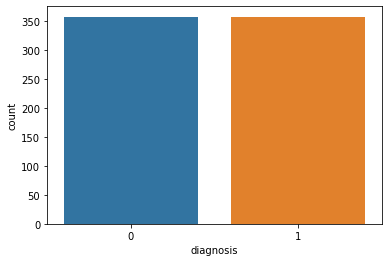

In [18]:
ax = sns.countplot(x="diagnosis", data=newData)

#### <a name="corr"></a> Correlation between variables

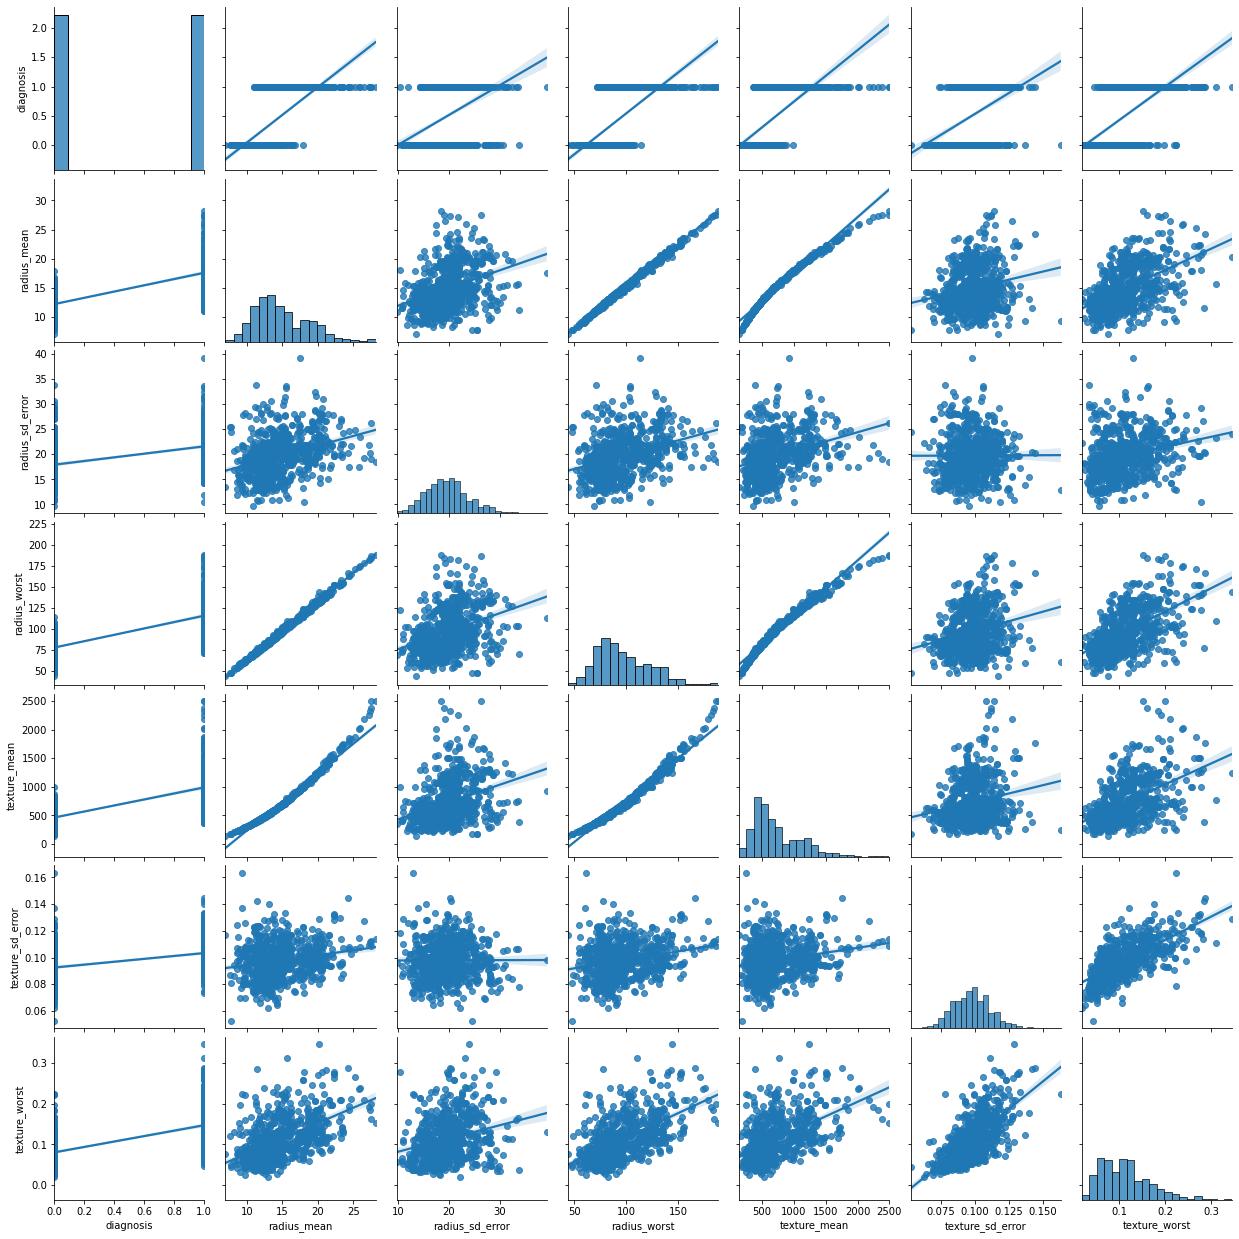

In [19]:
# Finding the correlation of important variables with each other using pairplot regression kind
dataCorr = newData[["diagnosis",
"radius_mean",                   
"radius_sd_error",
"radius_worst",                   
"texture_mean",
"texture_sd_error",
"texture_worst"
]]
# with regression
sns.pairplot(dataCorr, kind="reg")
plt.show()

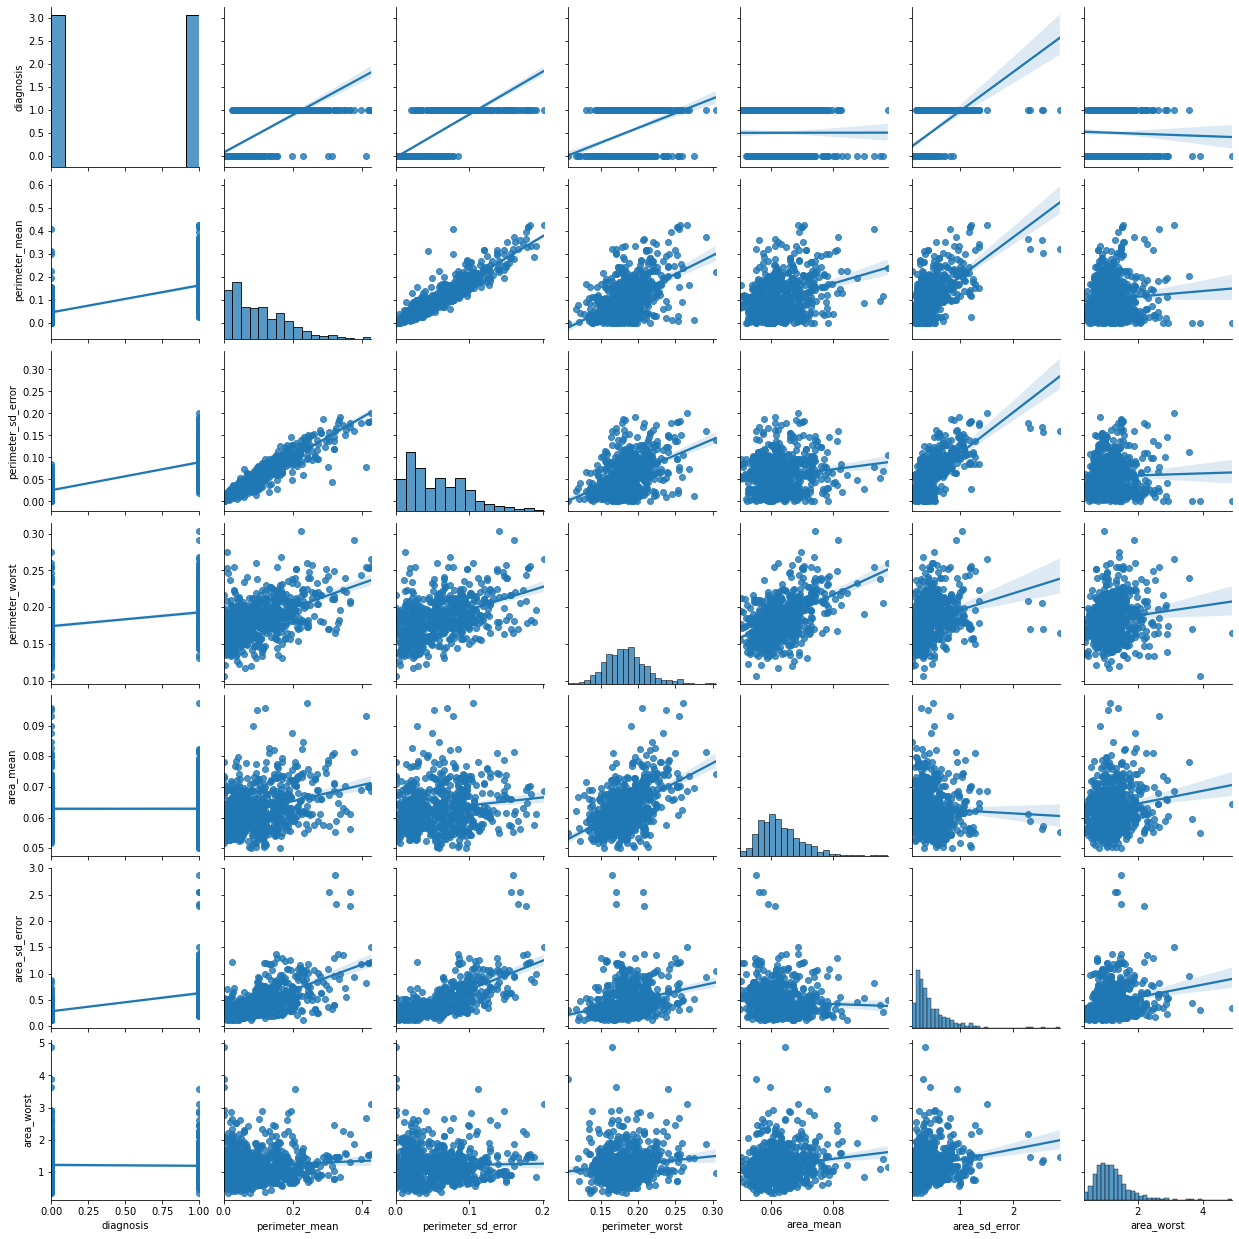

In [20]:
# Finding the correlation of important variables with each other using pairplot regression kind
dataCorr = newData[["diagnosis",
"perimeter_mean",                   
"perimeter_sd_error",
"perimeter_worst",                   
"area_mean",
"area_sd_error",
"area_worst"
]]
# with regression
sns.pairplot(dataCorr, kind="reg")
plt.show()

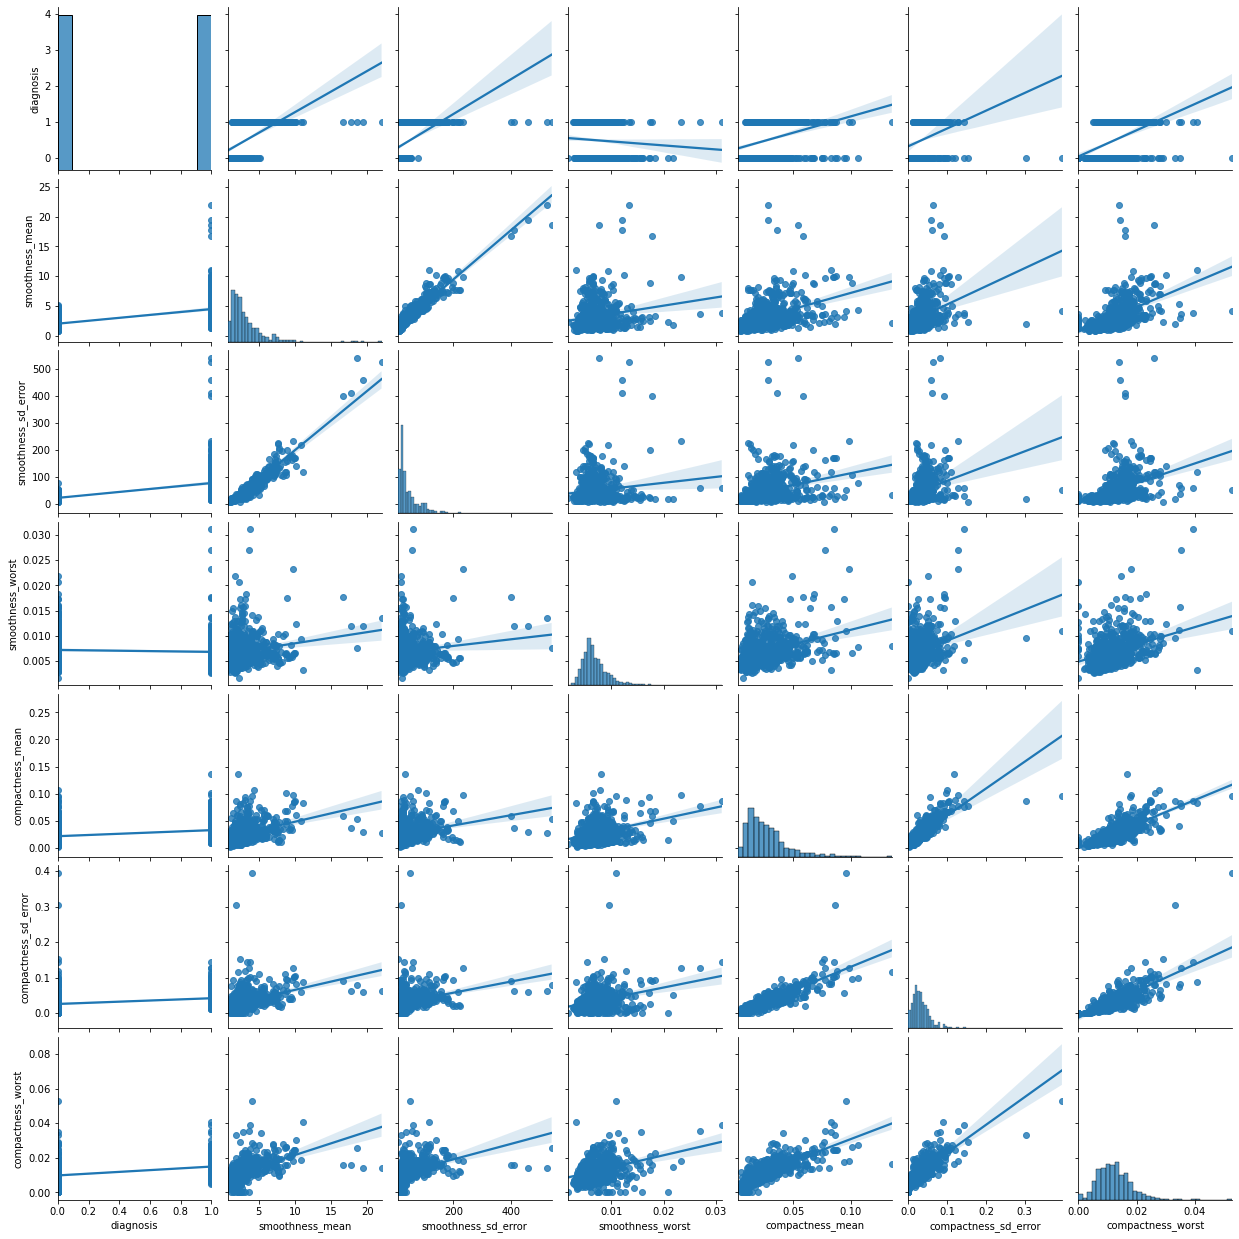

In [21]:
# Finding the correlation of important variables with each other using pairplot regression kind
dataCorr = newData[["diagnosis",
"smoothness_mean",                   
"smoothness_sd_error",
"smoothness_worst",                   
"compactness_mean",
"compactness_sd_error",
"compactness_worst"
]]
# with regression
sns.pairplot(dataCorr, kind="reg")
plt.show()

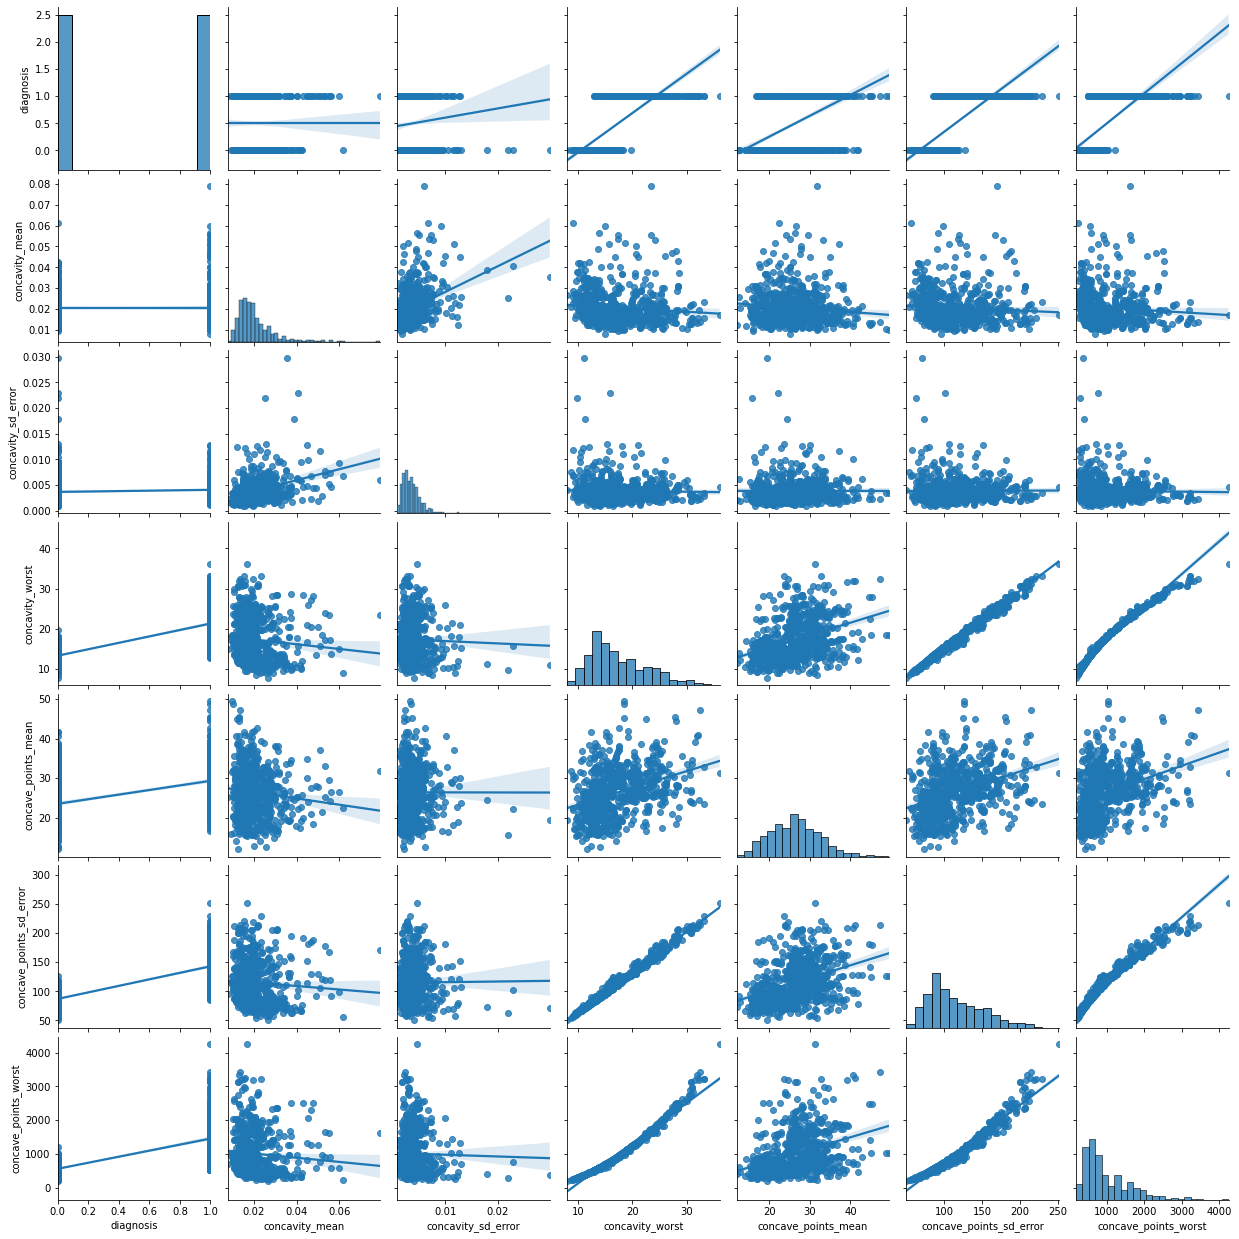

In [22]:
# Finding the correlation of important variables with each other using pairplot regression kind
dataCorr = newData[["diagnosis",
"concavity_mean",                   
"concavity_sd_error",
"concavity_worst",                   
"concave_points_mean",
"concave_points_sd_error",
"concave_points_worst"
]]
# with regression
sns.pairplot(dataCorr, kind="reg")
plt.show()

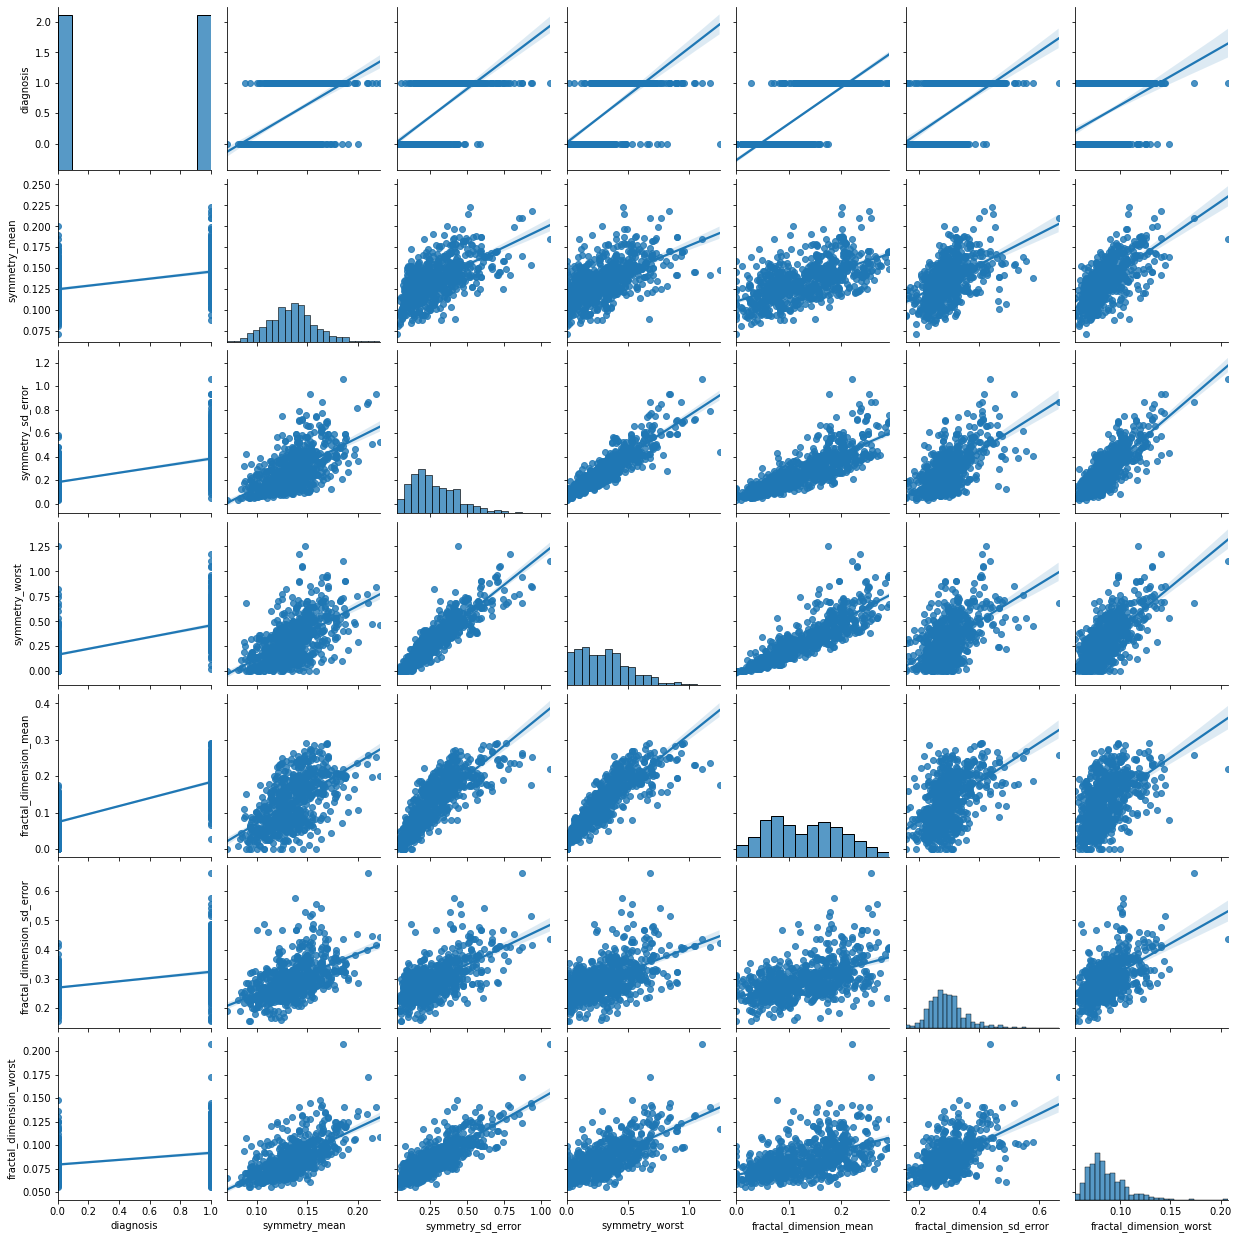

In [23]:
# Finding the correlation of important variables with each other using pairplot regression kind
dataCorr = newData[["diagnosis",
"symmetry_mean",                   
"symmetry_sd_error",
"symmetry_worst",                   
"fractal_dimension_mean",
"fractal_dimension_sd_error",
"fractal_dimension_worst"
]]
# with regression
sns.pairplot(dataCorr, kind="reg")
plt.show()

#### <a name="heat"></a> Heatmap of correlation

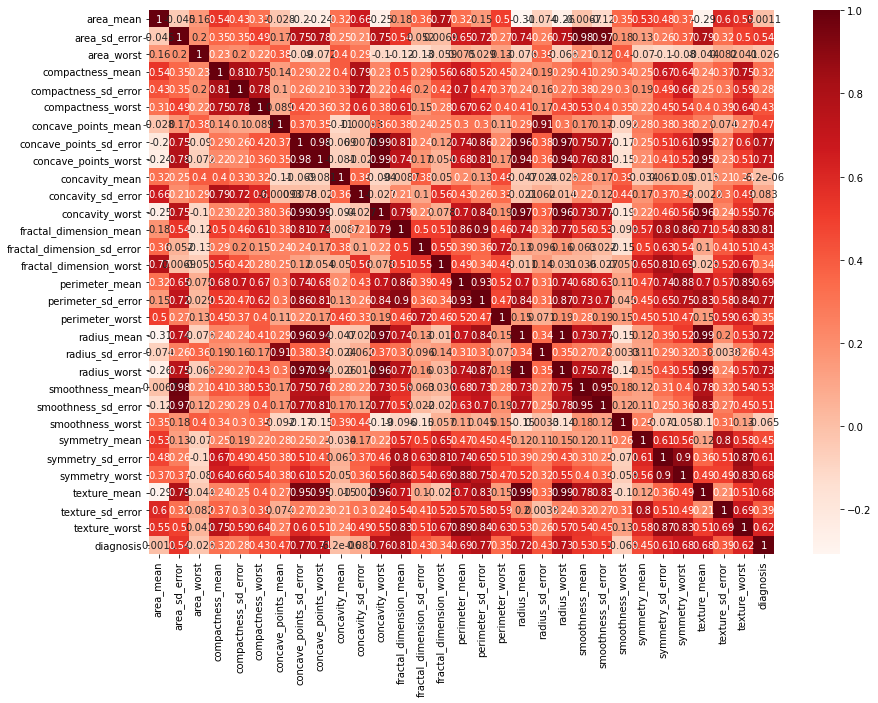

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(14,10))
cor = newData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
cor= newData.corr(method='pearson')['diagnosis'].sort_values(ascending=False)
print(cor)

diagnosis                     1.000000
fractal_dimension_mean        0.811142
perimeter_sd_error            0.770018
concave_points_sd_error       0.766626
concavity_worst               0.759471
radius_worst                  0.728308
radius_mean                   0.715921
concave_points_worst          0.705446
perimeter_mean                0.694949
texture_mean                  0.681494
symmetry_worst                0.675090
texture_worst                 0.618614
symmetry_sd_error             0.609044
area_sd_error                 0.542145
smoothness_mean               0.530221
smoothness_sd_error           0.514767
concave_points_mean           0.473164
symmetry_mean                 0.454028
radius_sd_error               0.432369
compactness_worst             0.431021
fractal_dimension_sd_error    0.426403
texture_sd_error              0.393158
perimeter_worst               0.346301
fractal_dimension_worst       0.342987
compactness_mean              0.318079
compactness_sd_error     

* From EDA above, the top 10 variables have high correlation with diagnosis are fractal_dimension_mean, perimeter_sd_error, concave_points_sd_error, concavity_worst, radius_worst, radius_mean, concave_points_worst, perimeter_mean, texture_mean and symmetry_worst. Only this top 10 variables will be take for modeling process since it had high correlation with target variable which will be help in predict malignant tumor.

### <a name="mod"></a> Modeling

In [26]:
import warnings
from pylab import rcParams
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# Import Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
# Import performance measure to evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
# Set target variable and predictive variables
X = ['fractal_dimension_mean', 'perimeter_sd_error', 'concave_points_sd_error', 'concavity_worst', 'radius_worst',
     'radius_mean', 'concave_points_worst', 'perimeter_mean', 'texture_mean', 'symmetry_worst']
Y = ["diagnosis"]
# import package to split train set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(newData[X],
                                              newData[Y],
                                              test_size=0.2,
                                              random_state=12)
# Review total train set and test set
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

571
143
571
143


In [28]:
# Review the class distribution of target variable for train set
train_y[Y].value_counts()

diagnosis
0            289
1            282
dtype: int64

#### <a name="lr"></a> Logistic Regression

In [29]:
# Fit the data into Logistic Regression Model
LR = LogisticRegression().fit(train_x,train_y)
predict = LR.predict(test_x)

C:\Users\valued customer\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\valued customer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
import statsmodels.api as sm
# Built regression model
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     154.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.19e-153
Time:                        12:55:40   Log-Likelihood:                -36.830
No. Observations:                 571   AIC:                             95.66
Df Residuals:                     560   BIC:                             143.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [31]:
# Evaluate performance of Logistic Regression
print("Accuracy = " ,accuracy_score(test_y,predict))
print("Precision = " ,precision_score(test_y,predict))
print("Recall = " ,recall_score(test_y,predict))
print("F1 Score = " ,f1_score(test_y,predict))

Accuracy =  0.9790209790209791
Precision =  0.9864864864864865
Recall =  0.9733333333333334
F1 Score =  0.9798657718120806


#### <a name="dt"></a> Decision Tree

In [32]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT = DT.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = DT.predict(test_x)

In [33]:
# Evaluate performance of Decision Tree
print("Accuracy = " ,accuracy_score(test_y,y_pred))
print("Precision = " ,precision_score(test_y,y_pred))
print("Recall = " ,recall_score(test_y,y_pred))
print("F1 Score = " ,f1_score(test_y,y_pred))

Accuracy =  0.9300699300699301
Precision =  0.9850746268656716
Recall =  0.88
F1 Score =  0.9295774647887323


#### <a name="adv"></a> The advantages and disadvantages of models

**1. Logistic Regression**

|Advantage| Disadvantage| 
|---|---| 
|Logistic regression is easier to implement, interpret, and very efficient to train |If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting| 
|It makes no assumptions about distributions of classes in feature space | It constructs linear boundaries|
|Good accuracy for many simple data sets and it performs well when the dataset is linearly separable | Logistic Regression requires average or no multicollinearity between independent variables|

**2. Decision Tree**

|Advantage| Disadvantage| 
|---|---| 
|Decision trees requires less effort for data preparation during pre-processing |A small change in the data can cause a large change in the structure of the decision tree causing instability| 
|A decision tree does not require normalization of data | Decision tree sometimes calculation can go far more complex compared to other algorithms|
|Missing values in the data also do NOT affect the process of building a decision tree | Decision tree often involves higher time to train the model|

#### <a name="perf"></a> The performance of the models

In [34]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [{"Logistic Regression", round(accuracy_score(test_y,predict),4), round(precision_score(test_y,predict),4),
           round(recall_score(test_y,predict),4), round(f1_score(test_y,predict),4)}, 
          {"Decision Tree", round(accuracy_score(test_y,y_pred),4), round(precision_score(test_y,y_pred),4), 
           round(recall_score(test_y,y_pred),4), round(f1_score(test_y,y_pred),4)}]
  
# create header
head = ["Accuracy", "Precision", "Recall", "F1-Score", "Model"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------+-------------+----------+------------+---------------------+
|   Accuracy |   Precision |   Recall |   F1-Score | Model               |
+============+=============+==========+============+=====================+
|     0.979  |      0.9865 |   0.9733 |     0.9799 | Logistic Regression |
+------------+-------------+----------+------------+---------------------+
|     0.9301 |      0.9851 |   0.9296 |     0.88   | Decision Tree       |
+------------+-------------+----------+------------+---------------------+


* From table above can be describe that both models give a good performance in predict malignant tumor. However, Logistic Regression model give better performance in all measurement rather than Decision Tree model.

#### <a name="var"></a> Importance predictive variables

**Logistic Regression**

In [35]:
# Calculate the coefficient
importance = LR.coef_[0]

                   feature  importance
9           symmetry_worst    8.400180
0   fractal_dimension_mean    2.384090
7           perimeter_mean    2.344335
1       perimeter_sd_error    1.575161
4             radius_worst    1.275434
2  concave_points_sd_error    1.097767
6     concave_points_worst    1.026913
8             texture_mean    0.988927
3          concavity_worst    0.432790
5              radius_mean    0.091869


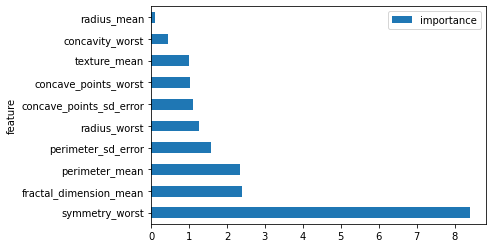

In [36]:
# Calculate the score importance
import math
feature_importance = pd.DataFrame(X, columns = ["feature"])
feature_importance["importance"] = pow(math.e, importance)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
print(feature_importance)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

* The most important variables for Logistic Regression in predict malignant tumor are symmetry_worst following by fractal_dimension_mean, the least important variable is radius_mean.

**Decision Tree**

In [37]:
#use inbuilt class feature_importances of tree based classifiers
print(DT.feature_importances_)

[0.         0.7430201  0.04687417 0.         0.00630568 0.00467087
 0.         0.09640037 0.02150397 0.03433172 0.04689312]


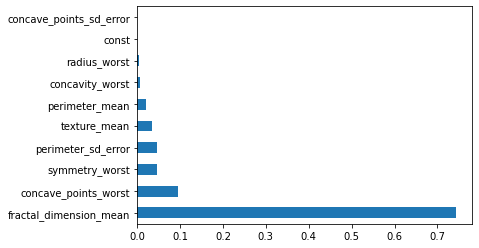

In [38]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(DT.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The most important variables for Decision Tree in predict malignant tumor are fractal_dimension_mean following by concave_points_worst, the least important variable is concave_points_sd_error.

### <a name="exp"></a> Explanation

#### <a name="tech"></a> To technical audiences

* In this dataset, there is bias classification. Hence, the bootstrap had been done to overcome this problem.
* The dataset can consider as small dataset. Can use oversampling to generate more data sample to make analysis more insightful.
* The modeling just use two classification techniques. Can compare with the other classification techniques to see which model give the best performance or can use ensamble technique.

#### <a name="non"></a> To non technical audiences

* The objective of this analysis is to predict malignant tumor and to determine which factor contributed to tumor identification.
* This analysis had been done using two classification techniques which are Logistic Regression and Decision Tree.
* Based on analysis, these two classification techniques give a good performance in tumor identification. However, Logistic Regression slightly give better performance compared to Decision Tree.
* Based on analysis also, fractal_dimension_mean, symmetry_worst and perimeter_sd_error had been choose by Logistic Regression and Decision Tree as factor that contributed to tumor identification.

### <a name="2"></a> PART 2: Feedback

#### <a name="s1"></a> Student-Sample-1
Link: https://gist.github.com/jeff-boykin/3af5e25eabd6c10d8aa248c556f625a0#file-student-sample-1-py

**1. Code**

  * Explain about the imported packaged, which one use for analysis which one use for modeling
  * The code to import LinearRegression not complete which turn out to be failed to debug. The code shoud be 'from sklearn.linear_model import LogisticRegression'
  * The code 'from sklearn.cross_validation import cross_val_score' will throw an error because 'sklearn.cross_validation' is now change to 'sklearn.model_selection'.

**2. Methodology**

  * The name assign for dataset should be same for analysis. In this sample, the dataset had been assign as 'd', but for setup the data, dataset name 'data' had been called which result the coding failed to debug.
  * Should explain which code for target variable and predictor variables or should be assign the code with 'Y' for target variable and 'X' for predictor variables.
  * Should explain which modeling technique will be use for modeling part, in this case should comment there 'built model for Linear Regression'
  * No need to repeat the code to import cross_val_score from sklearn.model_selection too many times, enough just import for once
  * For train_test_split, should explain how many percentage of train set and test set taken from the dataset
  * To calculate the mean absolute error, should import mean_absolute_error form sklearn.metrics, so it will auto calculate the value.

**3. Conceptual Understanding**

  * Must know which package to import for the analysis.
  * The modeling part, the dataset should be split into two dataset which are training dataset and testing dataset. This way, the sample of dataset can be train and the model can be validate by using testing dataset.

#### <a name="s2"></a> Student-Sample-2
Link: https://gist.github.com/jeff-boykin/3af5e25eabd6c10d8aa248c556f625a0#file-student-sample-2-py

**1. Code**

   * Explain about the imported packaged, which one use for analysis which one use for modeling.
   * The code 'from sklearn.cross_validation import cross_val_score' will throw an error because 'sklearn.cross_validation' is now change to 'sklearn.model_selection'.

**2. Methodology**

   * Should explain which modeling technique will be use for modeling part, in this case should comment there 'built model for Linear Regression'.
   * The modeling part should import train_test_split from sklearn.model_selection to split the dataset into training set and training set.
   * For train_test_split, should explain how many percentage of train set and test set taken from the dataset.
   * To calculate the mean absolute error, should import mean_absolute_error form sklearn.metrics, so it will auto calculate the value.

**3. Conceptual Understanding**

   * Must know which package to import for the analysis.
   * The modeling part, the dataset should be split into two dataset which are training dataset and testing dataset. This way, the sample of dataset can be train and the model can be validate by using testing dataset.